### Análisis de componentes
### Introducción a Python
### GitHub repository: https://github.com/jorgemauricio/analisis_componentes
### Instructor: Jorge Mauricio

In [1]:
# librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# librerías
from sklearn.ensemble import RandomForestRegressor

# The error metric, In this cas, we will use c-stat (aka ROC/AUC)
from sklearn.metrics import roc_auc_score

# an efficient data structure
import pandas as pd

%matplotlib inline

In [2]:
# leer csv
df = pd.read_csv("data/PINA_FISICOQUIMICOS_2.csv")

In [4]:
# estructura del csv
df.head()

,MUESTRA,ACIDEZ,PH,AW,SOLUBILIDAD,CRA,CRAC,L,C,H,...,HUMEDAD,FRUCTUOSA,GLUCOSA,SACAROSA,EXTRACTO ETEREO,FDT,FDI,FDS,PROTEINA,CENIZA
0,PiSAC50,0.355414,4.0,0.362,39.736158,7.455272,1.667719,58.0285,30.5201,78.2319,...,4.238965,3.149972,5.760169,10.764495,0.642319,43.230447,1.640096,44.870542,6.1321,3.207602
1,PiSAC50,0.355414,4.0,0.346,36.500099,7.310441,1.664416,55.9453,31.0333,78.0771,...,4.323308,2.481390,5.816839,9.577905,0.625527,44.570721,1.078127,45.648848,6.1028,3.235061
2,PiSAC50,0.369221,4.0,0.348,36.370840,7.021773,1.186019,55.6202,29.0558,78.1177,...,4.328086,2.624746,5.912691,9.774983,0.706897,43.230447,1.640096,44.870542,6.1331,3.237780
3,PiSAC50,0.355414,4.0,0.359,38.736158,7.255272,1.667719,55.6810,29.4136,77.6828,...,4.289647,3.149972,5.783302,10.578958,0.692319,44.570721,1.078127,45.648848,6.1321,3.217602
4,PiSAC50,0.355414,4.0,0.346,37.500099,7.110441,1.664416,57.6439,28.7736,78.0781,...,4.333083,2.481390,5.909170,10.093261,0.685527,43.230447,1.640096,44.870542,6.1028,3.225061


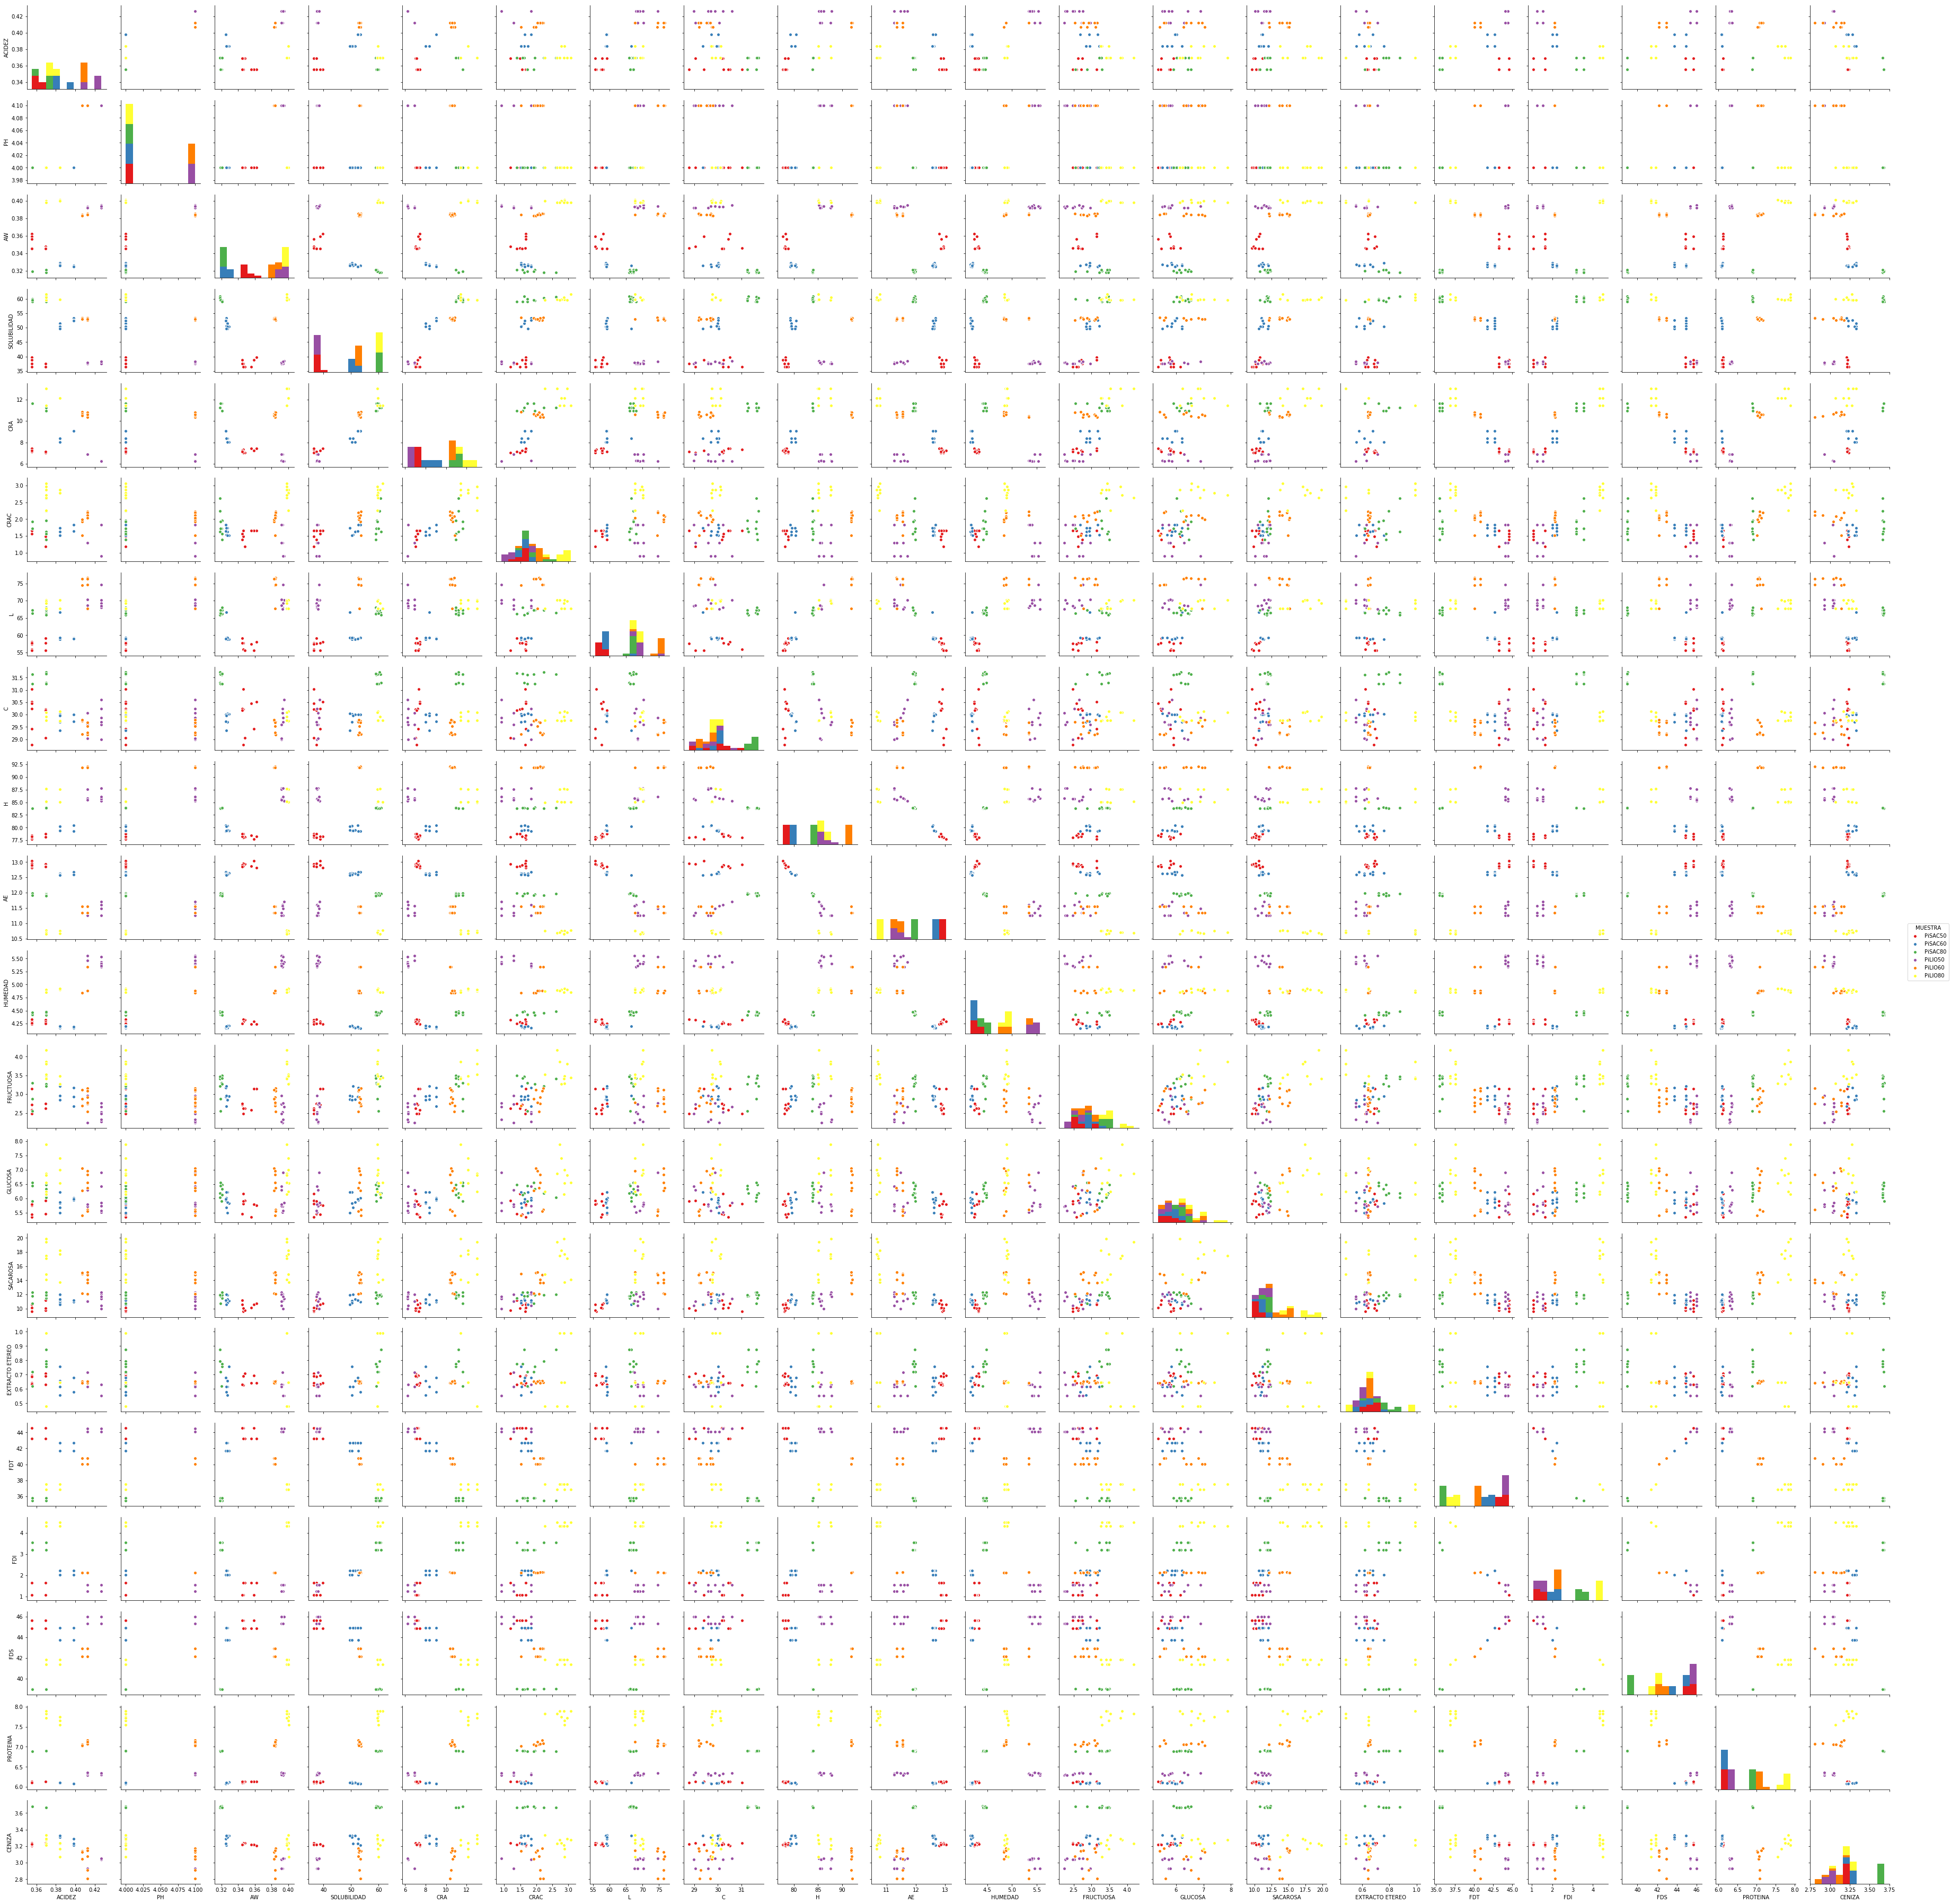

In [6]:
# EDA (Exploratory Data Analysis) correlación entre variables
sns.pairplot(df,hue='MUESTRA',palette='Set1')

In [7]:
# dividir los datos en entrenamiento y prueba para evitar que el modelo se sobrealimente
# Train Test Split
from sklearn.model_selection import train_test_split
X = df.drop('MUESTRA',axis=1)
y = df['MUESTRA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [8]:
# UTILIZAMOS UN ARBOL DE DECISIONES PARA DETERMINAR COMO ES QUE SE CLASIFICAN LOS COMPUESTOS DE ACUERDO
# A SUS CUALIDADES
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
# prediction and evaluation
predictions = dtree.predict(X_test)

In [10]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

    PiLIO50       1.00      1.00      1.00         2
    PiLIO60       1.00      1.00      1.00         3
    PiLIO80       1.00      1.00      1.00         4
    PiSAC50       1.00      1.00      1.00         1
    PiSAC60       1.00      1.00      1.00         5
    PiSAC80       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00        17



In [11]:
print(confusion_matrix(y_test,predictions))

[[2 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 4 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 2]]


In [14]:
# Tree Visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['ACIDEZ',
 'PH',
 'AW',
 'SOLUBILIDAD',
 'CRA',
 'CRAC',
 'L',
 'C',
 'H',
 'AE',
 'HUMEDAD',
 'FRUCTUOSA',
 'GLUCOSA',
 'SACAROSA',
 'EXTRACTO ETEREO',
 'FDT',
 'FDI',
 'FDS',
 'PROTEINA',
 'CENIZA']

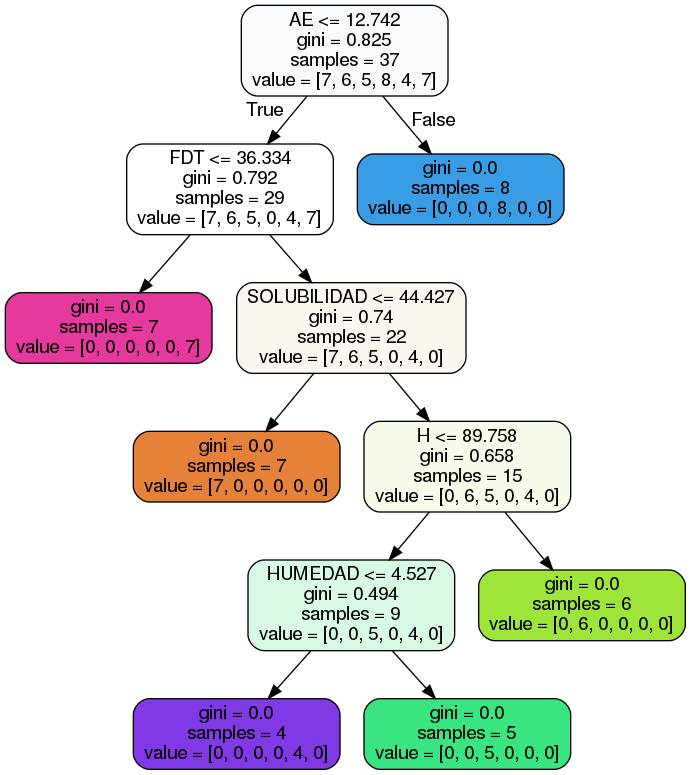

In [15]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

In [16]:
# random forests
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[2 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 4 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 2]]


In [18]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

    PiLIO50       1.00      1.00      1.00         2
    PiLIO60       1.00      1.00      1.00         3
    PiLIO80       1.00      1.00      1.00         4
    PiSAC50       1.00      1.00      1.00         1
    PiSAC60       1.00      1.00      1.00         5
    PiSAC80       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00        17



In [19]:
# PCA
from sklearn.preprocessing import StandardScaler

In [20]:
X = df.drop("MUESTRA", axis=1)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
scaled_data = scaler.transform(X)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
x_pca = pca.transform(scaled_data)

In [26]:
scaled_data.shape

(54, 20)

In [27]:
x_pca.shape

(54, 2)

In [28]:
X.head()

,ACIDEZ,PH,AW,SOLUBILIDAD,CRA,CRAC,L,C,H,AE,HUMEDAD,FRUCTUOSA,GLUCOSA,SACAROSA,EXTRACTO ETEREO,FDT,FDI,FDS,PROTEINA,CENIZA
0,0.355414,4.0,0.362,39.736158,7.455272,1.667719,58.0285,30.5201,78.2319,12.807784,4.238965,3.149972,5.760169,10.764495,0.642319,43.230447,1.640096,44.870542,6.1321,3.207602
1,0.355414,4.0,0.346,36.500099,7.310441,1.664416,55.9453,31.0333,78.0771,12.917182,4.323308,2.481390,5.816839,9.577905,0.625527,44.570721,1.078127,45.648848,6.1028,3.235061
2,0.369221,4.0,0.348,36.370840,7.021773,1.186019,55.6202,29.0558,78.1177,12.942837,4.328086,2.624746,5.912691,9.774983,0.706897,43.230447,1.640096,44.870542,6.1331,3.237780
3,0.355414,4.0,0.359,38.736158,7.255272,1.667719,55.6810,29.4136,77.6828,13.030902,4.289647,3.149972,5.783302,10.578958,0.692319,44.570721,1.078127,45.648848,6.1321,3.217602
4,0.355414,4.0,0.346,37.500099,7.110441,1.664416,57.6439,28.7736,78.0781,12.944502,4.333083,2.481390,5.909170,10.093261,0.685527,43.230447,1.640096,44.870542,6.1028,3.225061


In [29]:
def generar_indice(elemento):
    if elemento == "PiLIO50":
        return 1
    if elemento == "PiLIO60":
        return 2
    if elemento == "PiLIO80":
        return 3
    if elemento == "PiSAC50":
        return 4
    if elemento == "PiSAC60":
        return 5
    if elemento == "PiSAC80":
        return 6

In [30]:
y_dummies = list(map(generar_indice,y))

Text(0,0.5,'Second Principal Component')

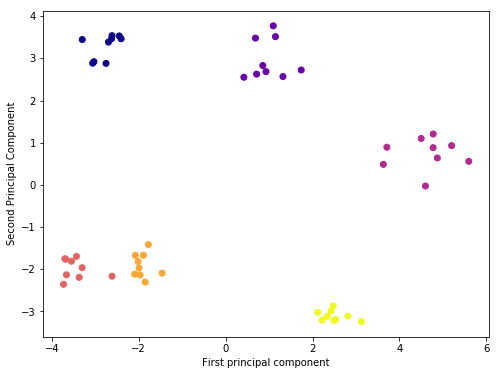

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_dummies,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [32]:
# interpreting the components
pca.components_

array([[-0.07781689, -0.07173407,  0.0652698 ,  0.30518825,  0.31880316,
         0.27044428,  0.17305129,  0.09610649,  0.16383757, -0.23564302,
         0.03735359,  0.26254764,  0.22412482,  0.26424247,  0.12245916,
        -0.30910976,  0.31670516, -0.28175622,  0.31622134,  0.12023836],
       [ 0.33129839,  0.35005511,  0.34624919, -0.08917155, -0.04628464,
         0.02485056,  0.28897751, -0.24730121,  0.30547224, -0.25885662,
         0.35962488, -0.09268921,  0.07580567,  0.13755714, -0.12343925,
         0.11581538, -0.06751281,  0.13047409,  0.10284953, -0.32972294]])

In [33]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns)

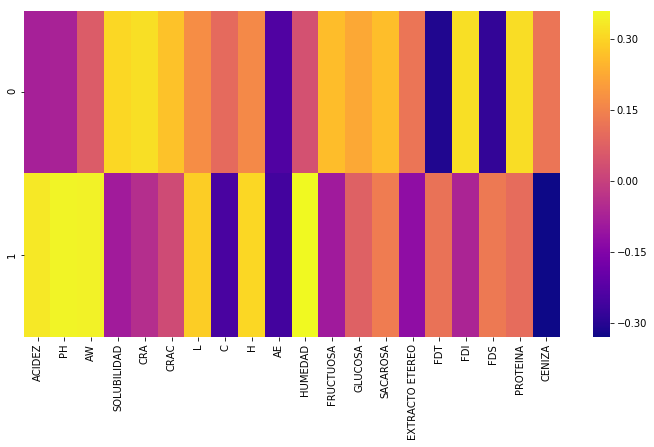

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [35]:
# K Nearest Neighbors
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data,y_dummies,
                                                    test_size=0.30)

In [36]:
# using KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [38]:
pred = knn.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(confusion_matrix(y_test,pred))

[[4 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 2]]


In [41]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00         4
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         2
          4       1.00      1.00      1.00         2
          5       1.00      1.00      1.00         3
          6       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00        17



In [42]:
# choosing a K Value
error_rate = []

# Will take some time
for i in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

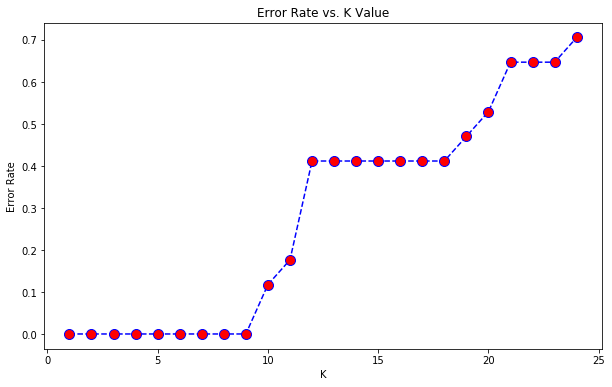

In [43]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [44]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[4 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 2]]


             precision    recall  f1-score   support

          1       1.00      1.00      1.00         4
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         2
          4       1.00      1.00      1.00         2
          5       1.00      1.00      1.00         3
          6       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00        17



In [45]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[0 0 0 4 0 0]
 [0 0 2 0 2 0]
 [0 0 2 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 0 2]]


             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.00      0.00      0.00         4
          3       0.50      1.00      0.67         2
          4       0.22      1.00      0.36         2
          5       0.00      0.00      0.00         3
          6       1.00      1.00      1.00         2

avg / total       0.20      0.35      0.24        17



/home/jorge/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# EDA

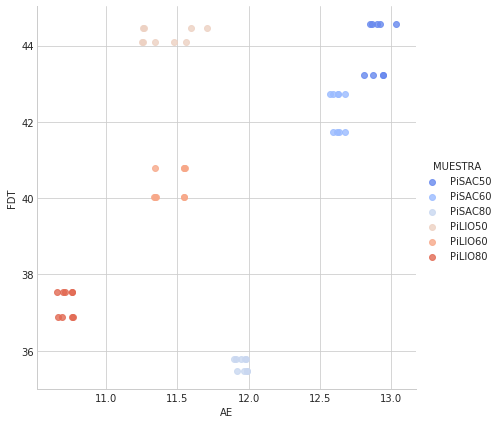

In [46]:
sns.set_style('whitegrid')
sns.lmplot('AE','FDT',data=df, hue='MUESTRA',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [47]:
from sklearn.cluster import KMeans

In [48]:
kmeans = KMeans(n_clusters=6)

In [49]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [50]:
kmeans.cluster_centers_

array([[ 0.3887014 ,  4.        ,  0.32644444, 51.13927685,  8.47547403,
         1.66402415, 59.96075556, 29.86942222, 79.71062222, 12.62199675,
         4.18749441,  2.94042807,  5.91368703, 11.22669509,  0.63948929,
        42.28007627,  2.12904746, 44.40912373,  6.09796667,  3.28725011],
       [ 0.37456274,  4.        ,  0.399     , 59.99964996, 12.18507143,
         2.78724825, 68.97161111, 29.88887778, 86.19457778, 10.72184298,
         4.88860582,  3.58513649,  6.8244192 , 16.93190119,  0.70476309,
        37.24033984,  4.39723115, 41.63757099,  7.77528889,  3.23298517],
       [ 0.42203256,  4.1       ,  0.393     , 37.88197572,  6.46611524,
         1.34760997, 69.69606667, 29.74081111, 86.32894444, 11.41451925,
         5.44864358,  2.54817968,  5.97562088, 11.3393485 ,  0.61044386,
        44.25341972,  1.41659493, 45.70970677,  6.32489556,  3.0062769 ],
       [ 0.41063102,  4.1       ,  0.38411111, 53.06475992, 10.57027319,
         2.02506507, 74.83942222, 29.48368889, 9

In [51]:
kmeans.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [54]:
df.head()

,MUESTRA,ACIDEZ,PH,AW,SOLUBILIDAD,CRA,CRAC,L,C,H,...,HUMEDAD,FRUCTUOSA,GLUCOSA,SACAROSA,EXTRACTO ETEREO,FDT,FDI,FDS,PROTEINA,CENIZA
0,PiSAC50,0.355414,4.0,0.362,39.736158,7.455272,1.667719,58.0285,30.5201,78.2319,...,4.238965,3.149972,5.760169,10.764495,0.642319,43.230447,1.640096,44.870542,6.1321,3.207602
1,PiSAC50,0.355414,4.0,0.346,36.500099,7.310441,1.664416,55.9453,31.0333,78.0771,...,4.323308,2.481390,5.816839,9.577905,0.625527,44.570721,1.078127,45.648848,6.1028,3.235061
2,PiSAC50,0.369221,4.0,0.348,36.370840,7.021773,1.186019,55.6202,29.0558,78.1177,...,4.328086,2.624746,5.912691,9.774983,0.706897,43.230447,1.640096,44.870542,6.1331,3.237780
3,PiSAC50,0.355414,4.0,0.359,38.736158,7.255272,1.667719,55.6810,29.4136,77.6828,...,4.289647,3.149972,5.783302,10.578958,0.692319,44.570721,1.078127,45.648848,6.1321,3.217602
4,PiSAC50,0.355414,4.0,0.346,37.500099,7.110441,1.664416,57.6439,28.7736,78.0781,...,4.333083,2.481390,5.909170,10.093261,0.685527,43.230447,1.640096,44.870542,6.1028,3.225061


In [55]:
def generar_indice(elemento):
    if elemento == "PiLIO50":
        return 1
    if elemento == "PiLIO60":
        return 2
    if elemento == "PiLIO80":
        return 3
    if elemento == "PiSAC50":
        return 4
    if elemento == "PiSAC60":
        return 5
    if elemento == "PiSAC80":
        return 6

In [59]:
df['Cluster'] = df['MUESTRA'].apply(generar_indice)
df.head(10)

,MUESTRA,ACIDEZ,PH,AW,SOLUBILIDAD,CRA,CRAC,L,C,H,...,FRUCTUOSA,GLUCOSA,SACAROSA,EXTRACTO ETEREO,FDT,FDI,FDS,PROTEINA,CENIZA,Cluster
0,PiSAC50,0.355414,4.0,0.362,39.736158,7.455272,1.667719,58.0285,30.5201,78.2319,...,3.149972,5.760169,10.764495,0.642319,43.230447,1.640096,44.870542,6.1321,3.207602,4
1,PiSAC50,0.355414,4.0,0.346,36.500099,7.310441,1.664416,55.9453,31.0333,78.0771,...,2.481390,5.816839,9.577905,0.625527,44.570721,1.078127,45.648848,6.1028,3.235061,4
2,PiSAC50,0.369221,4.0,0.348,36.370840,7.021773,1.186019,55.6202,29.0558,78.1177,...,2.624746,5.912691,9.774983,0.706897,43.230447,1.640096,44.870542,6.1331,3.237780,4
3,PiSAC50,0.355414,4.0,0.359,38.736158,7.255272,1.667719,55.6810,29.4136,77.6828,...,3.149972,5.783302,10.578958,0.692319,44.570721,1.078127,45.648848,6.1321,3.217602,4
4,PiSAC50,0.355414,4.0,0.346,37.500099,7.110441,1.664416,57.6439,28.7736,78.0781,...,2.481390,5.909170,10.093261,0.685527,43.230447,1.640096,44.870542,6.1028,3.225061,4
5,PiSAC50,0.369221,4.0,0.346,36.370840,7.021773,1.486019,57.7933,30.2135,78.7835,...,2.624746,6.166752,10.047898,0.689711,44.570721,1.078127,45.648848,6.1331,3.237780,4
6,PiSAC50,0.355414,4.0,0.356,36.370840,7.455272,1.667719,57.3791,30.4501,78.4581,...,2.581556,5.343771,10.165865,0.642319,43.230447,1.640096,44.870542,6.1321,3.217602,4
7,PiSAC50,0.355414,4.0,0.345,38.736158,7.210441,1.564416,57.6861,30.2406,78.2814,...,2.717712,5.447516,10.554915,0.635527,44.570721,1.078127,45.648848,6.1028,3.225061,4
8,PiSAC50,0.369221,4.0,0.345,37.500099,7.121773,1.386019,59.1673,30.1637,78.7629,...,2.742978,5.450762,11.169254,0.630690,44.570721,1.078127,45.648848,6.1331,3.217780,4
9,PiSAC60,0.383967,4.0,0.329,50.347429,8.023108,1.520684,58.8557,30.0137,79.4038,...,2.950521,5.832974,11.121562,0.758332,41.729455,2.023851,43.753306,6.1155,3.328899,5


In [58]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[0 0 0 0 0 0 0]
 [0 0 9 0 0 0 0]
 [0 0 0 9 0 0 0]
 [0 9 0 0 0 0 0]
 [0 0 0 0 9 0 0]
 [9 0 0 0 0 0 0]
 [0 0 0 0 0 9 0]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.00      0.00      0.00         9
          2       0.00      0.00      0.00         9
          3       0.00      0.00      0.00         9
          4       1.00      1.00      1.00         9
          5       0.00      0.00      0.00         9
          6       0.00      0.00      0.00         9

avg / total       0.17      0.17      0.17        54



/home/jorge/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jorge/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
